In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Load dataset
reviews_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

# Preprocess the text (e.g., remove punctuation, lowercase)
reviews_df['Review'] = reviews_df['Review'].str.lower()

In [3]:
# Define a function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function to the 'Review' column
reviews_df['sentiment'] = reviews_df['Review'].apply(get_sentiment)


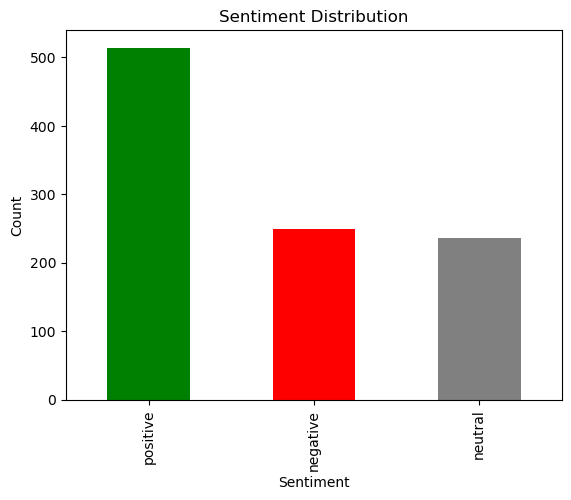

In [4]:
# Count the number of positive, neutral, and negative reviews
sentiment_counts = reviews_df['sentiment'].value_counts()

# Create a bar plot
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


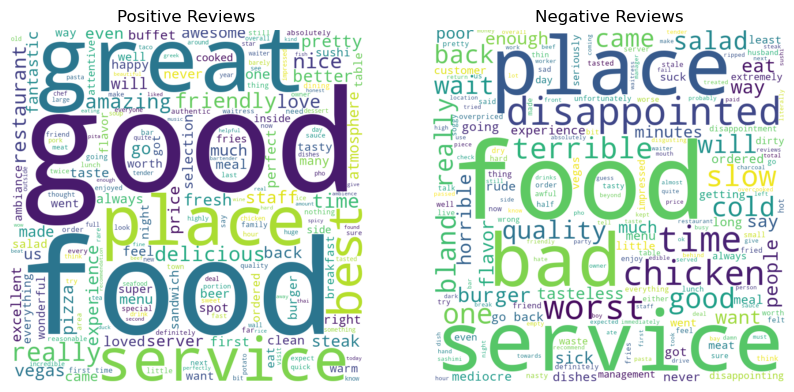

In [5]:
from wordcloud import WordCloud

# Load restaurant review dataset
reviews_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

# Preprocess the text (e.g., remove punctuation, lowercase)
reviews_df['Review'] = reviews_df['Review'].str.lower()

# Analyze sentiment and classify as positive, neutral, or negative
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

reviews_df['Sentiment'] = reviews_df['Review'].apply(get_sentiment)

# Word Clouds for positive and negative reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'negative']['Review'])

wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()